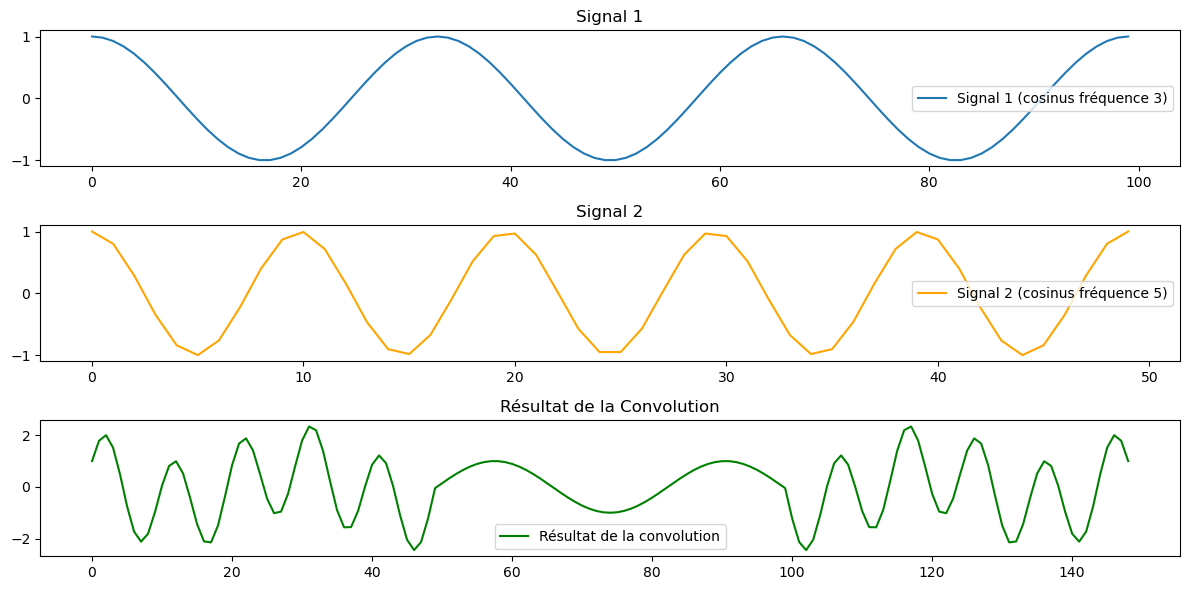

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction personnalisée pour calculer la convolution
def custom_convolve(signal1, signal2):
    """
    Calcule la convolution de deux signaux continus.
    """
    len1 = len(signal1)
    len2 = len(signal2)
    output_len = len1 + len2 - 1  # Taille de la convolution
    result = np.zeros(output_len)  # Initialisation de la sortie
    
    for i in range(output_len):
        for j in range(len2):
            if 0 <= i - j < len1:  # Vérification des limites
                result[i] += signal1[i - j] * signal2[j]
    
    return result

# Définir deux signaux numériques longs basés sur le cosinus
t1 = np.linspace(0, 2 * np.pi, 100)  # Temps pour le signal 1
t2 = np.linspace(0, 2 * np.pi, 50)   # Temps pour le signal 2

signal1 = np.cos(3 * t1)  # Signal 1 : cosinus de fréquence 3
signal2 = np.cos(5 * t2)  # Signal 2 : cosinus de fréquence 5

# Calcul de la convolution avec la fonction personnalisée
resultat = custom_convolve(signal1, signal2)

# Affichage des signaux et du résultat
plt.figure(figsize=(12, 6))

# Signal 1
plt.subplot(3, 1, 1)
plt.plot(signal1, label="Signal 1 (cosinus fréquence 3)")
plt.title("Signal 1")
plt.legend()

# Signal 2
plt.subplot(3, 1, 2)
plt.plot(signal2, label="Signal 2 (cosinus fréquence 5)", color='orange')
plt.title("Signal 2")
plt.legend()

# Résultat de la convolution
plt.subplot(3, 1, 3)
plt.plot(resultat, label="Résultat de la convolution", color='green')
plt.title("Résultat de la Convolution")
plt.legend()

plt.tight_layout()
plt.show()


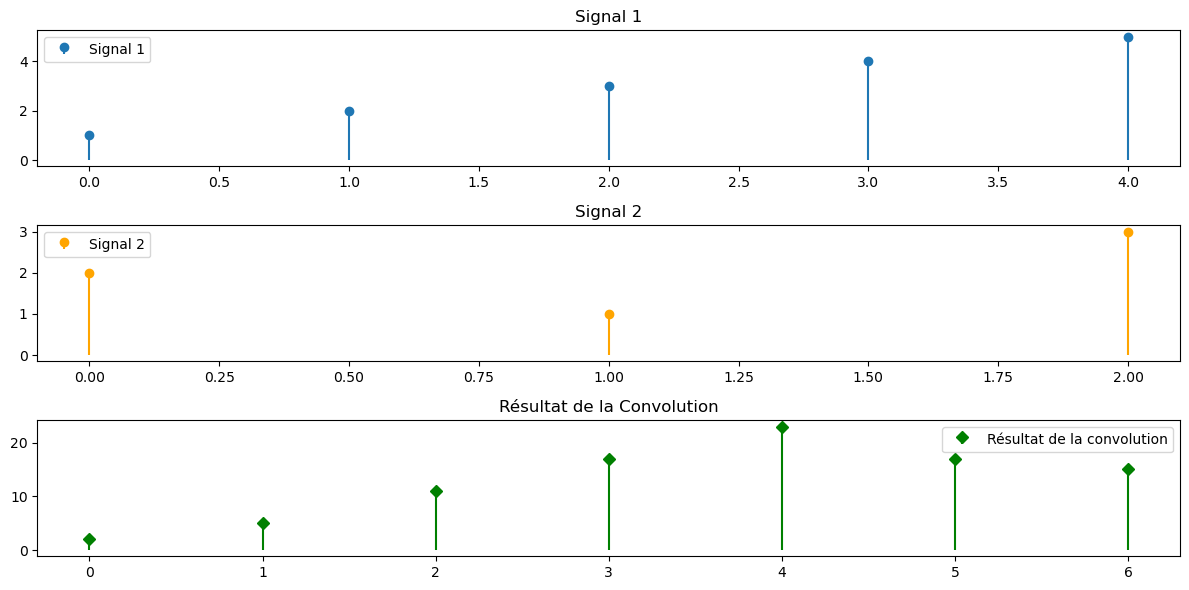

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction personnalisée pour calculer la convolution de deux signaux numériques
def custom_convolve(signal1, signal2):
    """
    Fonction pour calculer la convolution de deux signaux numériques.
    """
    len1 = len(signal1)
    len2 = len(signal2)
    output_len = len1 + len2 - 1  # Taille de la convolution
    result = [0] * output_len  # Initialisation de la sortie
    
    for i in range(output_len):
        for j in range(len2):
            if 0 <= i - j < len1:  # Vérification des limites
                result[i] += signal1[i - j] * signal2[j]
                
    return result

# Définir deux signaux numériques sans valeurs nulles
signal1 = [1, 2, 3, 4, 5]  # Signal 1
signal2 = [2, 1, 3]        # Signal 2

# Calcul de la convolution avec la fonction personnalisée
resultat = custom_convolve(signal1, signal2)

# Affichage des signaux et du résultat
plt.figure(figsize=(12, 6))

# Signal 1
plt.subplot(3, 1, 1)
plt.stem(range(len(signal1)), signal1, label="Signal 1", basefmt=' ')
plt.title("Signal 1")
plt.legend()

# Signal 2
plt.subplot(3, 1, 2)
plt.stem(range(len(signal2)), signal2, linefmt='orange', markerfmt='o', basefmt=' ', label="Signal 2")
plt.title("Signal 2")
plt.legend()

# Résultat de la convolution
plt.subplot(3, 1, 3)
plt.stem(range(len(resultat)), resultat, linefmt='green', markerfmt='D', basefmt=' ', label="Résultat de la convolution")
plt.title("Résultat de la Convolution")
plt.legend()

plt.tight_layout()
plt.show()


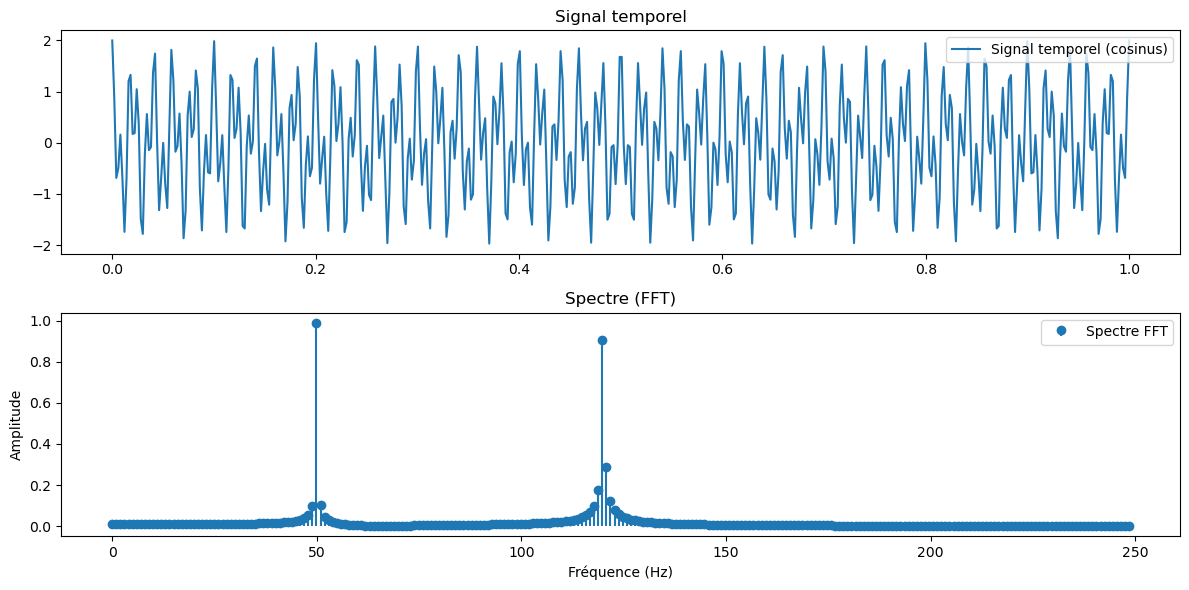

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Définir un signal cosinusique
t = np.linspace(0, 1, 500)  # Temps (1 seconde, 500 points)
signal = np.cos(2 * np.pi * 50 * t) + np.cos(2 * np.pi * 120 * t)  # Somme de 2 cosinus : 50 Hz et 120 Hz

# Calcul de la FFT
fft_result = np.fft.fft(signal)  # Transformée de Fourier
freqs = np.fft.fftfreq(len(signal), d=t[1] - t[0])  # Fréquences associées

# Garder seulement les fréquences positives
positive_freqs = freqs[freqs >= 0]
positive_fft = 2 / len(signal) * np.abs(fft_result[freqs >= 0])  # Normalisation

# Affichage
plt.figure(figsize=(12, 6))

# Signal temporel
plt.subplot(2, 1, 1)
plt.plot(t, signal, label="Signal temporel (cosinus)")
plt.title("Signal temporel")
plt.legend()

# Spectre fréquentiel
plt.subplot(2, 1, 2)
plt.stem(positive_freqs, positive_fft, basefmt=" ", label="Spectre FFT")
plt.title("Spectre (FFT)")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()


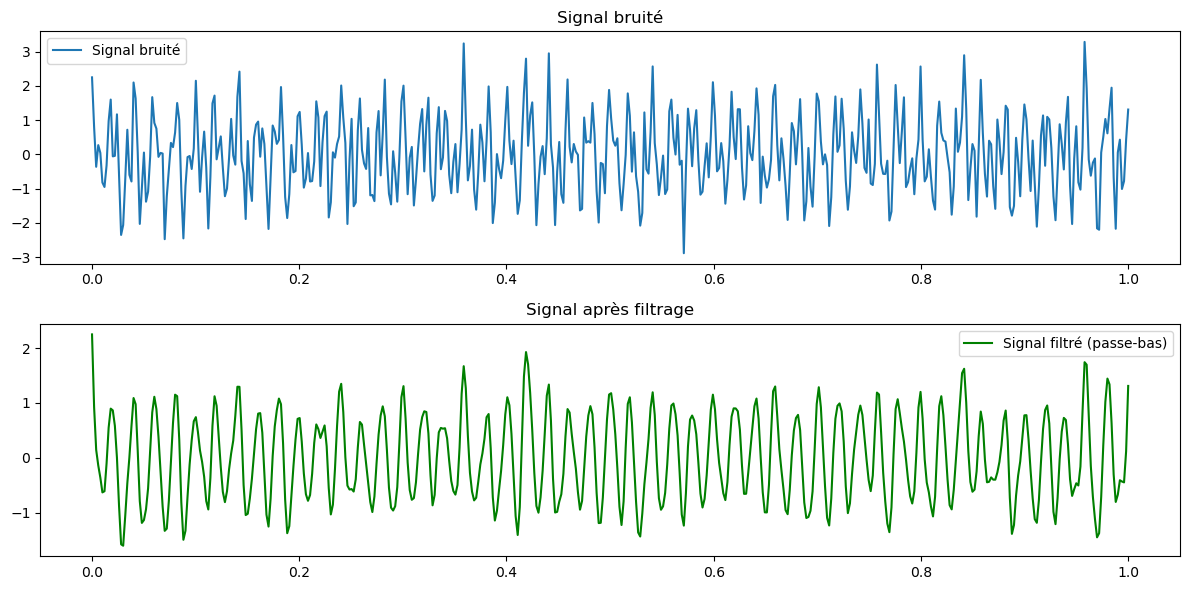

In [15]:
from scipy.signal import butter, filtfilt

# Définir un signal bruité
np.random.seed(42)
t = np.linspace(0, 1, 500)
signal = np.cos(2 * np.pi * 50 * t) + np.cos(2 * np.pi * 120 * t) + np.random.normal(0, 0.5, t.shape)

# Création d'un filtre passe-bas (fréquence de coupure = 100 Hz)
fc = 100  # Fréquence de coupure
fs = 500  # Fréquence d'échantillonnage
b, a = butter(4, fc / (fs / 2), btype='low')  # Filtre passe-bas (ordre 4)

# Application du filtre
signal_filtre = filtfilt(b, a, signal)

# Affichage
plt.figure(figsize=(12, 6))

# Signal original
plt.subplot(2, 1, 1)
plt.plot(t, signal, label="Signal bruité")
plt.title("Signal bruité")
plt.legend()
# Signal filtré
plt.subplot(2, 1, 2)
plt.plot(t, signal_filtre, label="Signal filtré (passe-bas)", color='green')
plt.title("Signal après filtrage")
plt.legend()

plt.tight_layout()
plt.show()

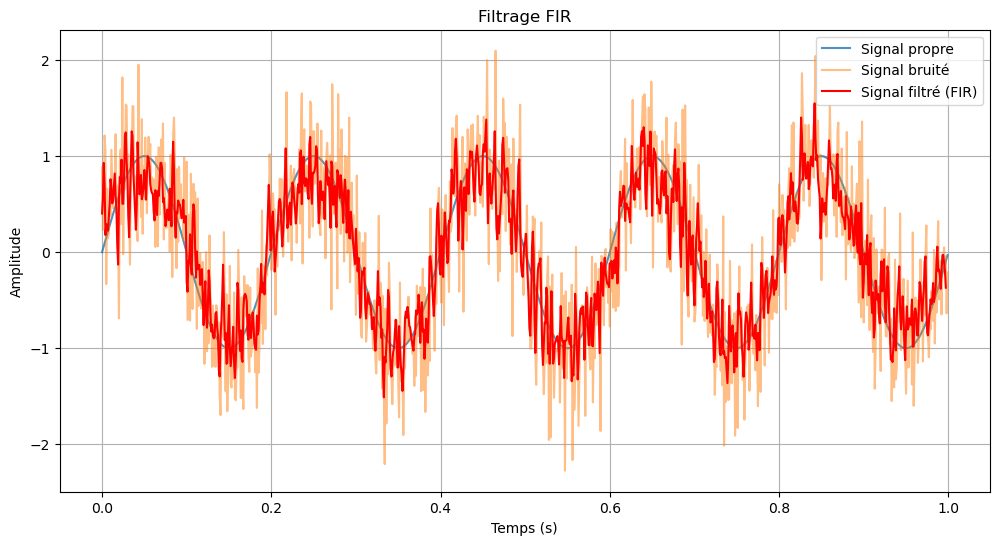

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def fir_filter(signal, coefficients):
    """ Applique un filtre FIR sur un signal. """
    filtered_signal = np.convolve(signal, coefficients, mode='valid')
    return filtered_signal

# Paramètres du signal
np.random.seed(0)
n = 1000
t = np.linspace(0, 1, n, endpoint=False)
clean_signal = np.sin(2 * np.pi * 5 * t)  # Signal sinusoïdal de 5 Hz
noise = np.random.normal(0, 0.5, size=n)
noisy_signal = clean_signal + noise

# Coefficients du filtre FIR
coeffs = np.array([0.2, 0.5, 0.2])  # Moyenne simple à trois points
filtered_signal = fir_filter(noisy_signal, coeffs)

# Tracer les signaux
plt.figure(figsize=(12, 6))
plt.plot(t, clean_signal, label='Signal propre', alpha=0.8)
plt.plot(t, noisy_signal, label='Signal bruité', alpha=0.5)
plt.plot(t[:len(filtered_signal)], filtered_signal, label='Signal filtré (FIR)', color='red')
plt.title('Filtrage FIR')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


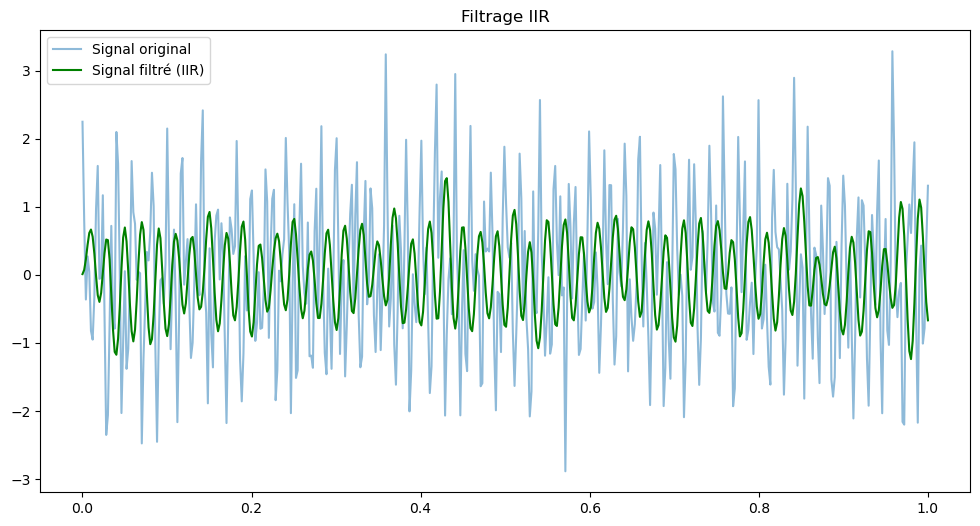

In [10]:
import numpy as np
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt

# Définir un signal bruité
np.random.seed(42)
t = np.linspace(0, 1, 500)
signal = np.cos(2 * np.pi * 50 * t) + np.cos(2 * np.pi * 120 * t) + np.random.normal(0, 0.5, t.shape)

# Paramètres du filtre
order = 4  # Ordre du filtre
cutoff = 100  # Fréquence de coupure (Hz)
fs = 1000  # Fréquence d'échantillonnage (Hz)

# Conception du filtre IIR passe-bas
b, a = butter(order, cutoff / (fs / 2), btype='low', analog=False)

# Application du filtre IIR
signal_iir = lfilter(b, a, signal)

# Affichage
plt.figure(figsize=(12, 6))
plt.plot(t, signal, label="Signal original", alpha=0.5)
plt.plot(t, signal_iir, label="Signal filtré (IIR)", color='green')
plt.title("Filtrage IIR")
plt.legend()
plt.show()
